<a href="https://colab.research.google.com/github/flavianacif/DSWP/blob/master/Exercicio_FIFA_IsolationForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [13]:
!pip install pyod
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.ensemble import IsolationForest

# Scaling variables
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF

#from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
#from pyod.models.lof import LOF
from scipy import stats

# remove warnings to keep notebook clean
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 102kB 2.3MB/s 
     |████████████████████████████████| 2.1MB 4.4MB/s 
  Created wheel for pyod: filename=pyod-0.8.3-cp36-none-any.whl size=110349 sha256=2c02345c879ce9832b686461154d63c1a6ca6f049126f54e3bc997e8580cb8e7
  Stored in directory: /root/.cache/pip/wheels/29/46/95/86facd235cce1d58ae6747ab1aea2b3742564325a66a60863a
  Created wheel for combo: filename=combo-0.1.1-cp36-none-any.whl size=42113 sha256=86711a3b28df7d1de3b66554759ec8a453f76a69604d3b2125b55045038193eb
  Stored in directory: /root/.cache/pip/wheels/55/ec/e5/a2331372c676c467e70c6646e646edf6997d5c4905b8c0f5e6
  Created wheel for suod: filename=suod-0.0.4-cp36-none-any.whl size=2167158 sha256=13269204727f7ea15f06f5f5c0df259428a6a55accf6e7496a79e396d632182c
  Stored in directory: /root/.cache/pip/wheels/57/55/e5/a4fca65bba231f6d0115059b589148774b41faea25b3f2aa27
Successfully built pyod combo suod


In [2]:
df = pd.read_csv('https://github.com/flavianacif/DSWP/raw/master/Dataframes/FIFA_algumas_features.csv')

In [7]:
df_fifa = df.copy()

df_fifa.head()

,ID,overall,potential,value,wage,nationality,position,age,preferred_foot
0,158023,94,94,110500000,565000,Argentina,RF,31,Left
1,20801,94,94,77000000,405000,Portugal,ST,33,Right
2,190871,92,93,118500000,290000,Brazil,LW,26,Right
3,193080,91,93,72000000,260000,Spain,GK,27,Right
4,192985,91,92,102000000,355000,Belgium,RCM,27,Right


In [8]:
df_fifa.isna().sum()

ID                 0
overall            0
potential          0
value              0
wage               0
nationality        0
position          60
age                0
preferred_foot    48
dtype: int64

In [9]:
df_fifa.shape

(18207, 9)

In [11]:
df_fifa = df_fifa.dropna()
df_fifa.shape

(18147, 9)

In [17]:
df_fifa.columns

Index(['ID', 'overall', 'potential', 'value', 'wage', 'nationality',
       'position', 'age', 'preferred_foot'],
      dtype='object')

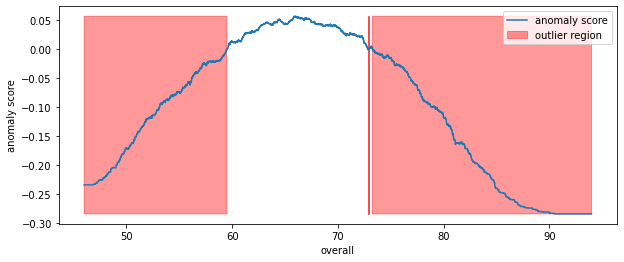

In [14]:
# Instanciamento 
isolation_forest = IsolationForest(n_estimators = 100) 

# Ajustamento (fit())
isolation_forest.fit(df_fifa['overall'].values.reshape(-1, 1))
xx = np.linspace(df_fifa['overall'].min(), df_fifa['overall'].max(), len(df_fifa)).reshape(-1, 1)

anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize = (10, 4))
plt.plot(xx, anomaly_score, label = 'anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), where = outlier == -1, color = 'r', alpha = .4, label = 'outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('overall')
plt.show()

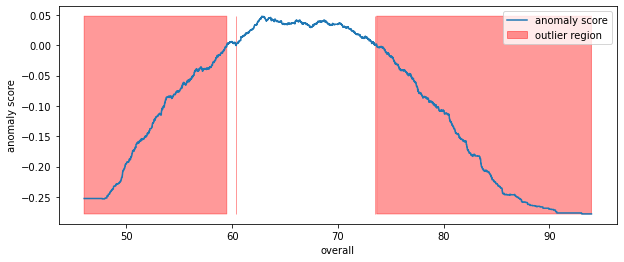

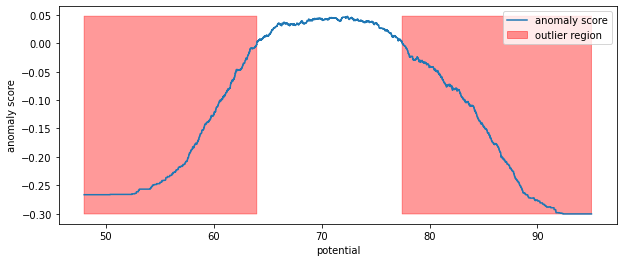

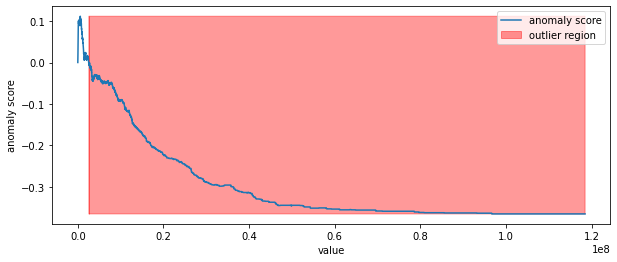

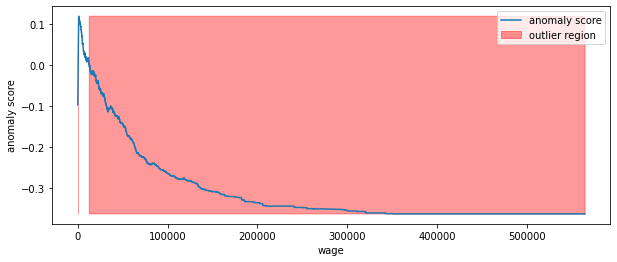

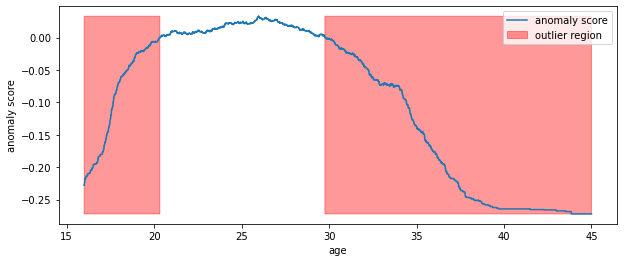

In [20]:
# Instanciamento 
isolation_forest = IsolationForest(n_estimators = 100) 
l_var = ['overall', 'potential', 'value', 'wage', 'age']
# Ajustamento (fit())
for var in l_var:
  isolation_forest.fit(df_fifa[var].values.reshape(-1, 1))
  xx = np.linspace(df_fifa[var].min(), df_fifa[var].max(), len(df_fifa)).reshape(-1, 1)
  anomaly_score = isolation_forest.decision_function(xx)
  outlier = isolation_forest.predict(xx)
  plt.figure(figsize = (10, 4))
  plt.plot(xx, anomaly_score, label = 'anomaly score')
  plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), where = outlier == -1, color = 'r', alpha = .4, label = 'outlier region')
  plt.legend()
  plt.ylabel('anomaly score')
  plt.xlabel(var)
  plt.show()